In [1]:
import string
import pandas as pd

class Node(object):
    '''
    This is a class that represents a node. The functions of a class are called methods. Instantiations of this class
    will create objects that have access to the methods. 
    
    Each method begins with an argument of "self" which lets the methos know which object it belongs to.
    
    For the Node object, we care about the name of the node and a dictionary naming the adjacent nodes. The adjacent
    dictionary keys will be the name's of adjacent nodes and the value will be the weight of that edge.
    '''
    def __init__(self, name):
        # The init method is magic python method that get's called when an object is instantiated. 
        self.name = name  # Take the name given at instantiation and assign it to the object
        self.adjacent = {}  # When we create the node, we don't know about any adjacent nodes. Create a placeholder
        
    def __str__(self):
        # When printing a node, format it like this:
        return "Node {}: {}".format(self.name, self.adjacent)
    
    def __repr__(self):
        # When representing this object, use the str method
        return self.__str__()

In [2]:
class Graph(object):
    '''
    This class represents a graph. The graph is consists of a collection of nodes. 
    '''
    def __init__(self, adjacency_matrix=None):
        '''
        When the graph is instantiated it will not know about any of its member nodes. There is an optional 
        `adjacency_matrix` argument that defaults to None. If an adjacency_matrix is provided, then we can 
        create the member nodes, their relationships, and add them to this graph.
        '''
        self.nodes = {}
        if adjacency_matrix.any() or adjacency_matrix:
            # We were provided an adjacency matrix
            self._create_member_nodes_from_adjacency_matrix(adjacency_matrix)
            
    def __str__(self):
        return '\n'.join([str(n) for n in self.nodes.values()])
    
    def __repr__(self):
        return self.__str__()
    
    def _create_member_nodes_from_adjacency_matrix(self, adjacency_matrix):
        # A preceeding underscore indicetes a method that is only called within the class. 
        # Create nodes and weights from an adjacency matrix (list of lists) and assign them to this graph
        letters = list(string.ascii_lowercase)  # Get a list of letters to assign to the nodes we create
        needed_letters = len(adjacency_matrix)
        if needed_letters > len(letters):
            # Give the user an error that the input matrix is too large to have 
            raise ValueError("The matrix is too large to create from 26 letters. Please manually assign names to nodes and then add them to the graph.")
        
        for i, row in enumerate(adjacency_matrix):  # get an index of the row and the contentx of the row
            letter_name = letters[i]
            node = Node(letter_name)
            for j, column_value in enumerate(row):
                if column_value != 0:  # There is an adjacent node here
                    adjacent_letter_name = letters[j]
                    node.adjacent[adjacent_letter_name] = column_value
            self.nodes[letter_name] = node
            
    def get_distance_of_path(self, path):
        # Given a list of node names within the graph, find its distance using the node adjacency measures
        distance = 0
        for i, node_name in enumerate(path[:-1]):
            # Gets the index and node name for each in the path except for the last one
            this_node = self.nodes[node_name]
            next_node = self.nodes[path[i+1]]
            distance += this_node.adjacent[next_node.name]  # Get the distance from this_node to next node
        
        return distance
    
    def find_all_paths_between(self, a, b, path=None):
        if not path:
            # No path list provided, create one
            path = []

        path = path + [a] # Add a to the path

        if a == b:  # This is a path to itself, at the end of a path
            return [path]
        if a not in self.nodes:  # a could not be found in the graph
            return []
        paths = []
        for node in self.nodes[a].adjacent:  # look to adjacent nodes of a
            if node not in path:
                newpaths = self.find_all_paths_between(node, b, path)  # Recursivly go down another level
                for newpath in newpaths:
                    paths.append(newpath)
        return paths
    
    def shortest_path(self, a, b):
        # Get the distance of each weighted path and return the shortest
        all_paths = self.find_all_paths_between(a, b)
        
        if not all_paths:
            return []
        
        # The shortest path will be the first path in the list
        shortest_path = None
        shortest_distance = None
        
        for path in all_paths:
            p_distance = self.get_distance_of_path(path)
            if not shortest_distance or p_distance < shortest_distance:
                # This path is shorter
                shortest_path = path
                shortest_distance = p_distance
                
        return shortest_path
    
    def is_tree(self):
        # returns True if the graph is a tree, otherwise False
        
        node_names = list(self.nodes.keys())
        first = node_names[0]  # Make sure the first node has a path to all other nodes
        second = node_names[1]  # Used to determine if acyclic
        
        for node in node_names:
            if node == first:
                continue  # Don't compare it against itself
            if not self.find_all_paths_between(first, node):
                return False  # No path was found between first and node, this must not be a tree
            
        # Check if cyclic. Trees must be acyclic.
        paths_back = self.find_all_paths_between(first, second)
        adjacent = [first, second] in paths_back
        for p in paths_back:
            if set(p) == set(node_names) and adjacent:
                # This path contains each node and returns to itself. It is cyclic
                return False
        
        return True


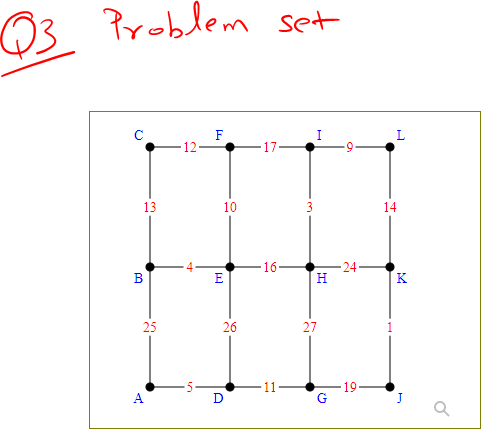

In [3]:
df = pd.read_excel('D://Finance python books//Covid 19 Mark meldrum and damodran//Math for data scientist//Module5-Graph theory//Q3_data_Set.xlsx')

In [4]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,0,25,0,5,0,0,0,0,0,0,0,0
1,25,0,13,0,4,0,0,0,0,0,0,0
2,0,13,0,0,0,12,0,0,0,0,0,0
3,5,0,0,0,26,0,11,0,0,0,0,0
4,0,4,0,26,0,0,0,16,0,0,0,0


In [5]:
df.to_numpy()

array([[ 0, 25,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [25,  0, 13,  0,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0, 26,  0, 11,  0,  0,  0,  0,  0],
       [ 0,  4,  0, 26,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0, 12,  0, 10,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0, 27,  0, 19,  0,  0],
       [ 0,  0,  0,  0, 26,  0, 27,  0,  0,  0, 24,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  3,  0,  0,  0,  9],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  1,  0, 14],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  9,  0, 14,  0]], dtype=int64)

In [6]:
matrix =df.values

In [7]:
matrix

array([[ 0, 25,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [25,  0, 13,  0,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0, 26,  0, 11,  0,  0,  0,  0,  0],
       [ 0,  4,  0, 26,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0, 12,  0, 10,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0, 27,  0, 19,  0,  0],
       [ 0,  0,  0,  0, 26,  0, 27,  0,  0,  0, 24,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  3,  0,  0,  0,  9],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  1,  0, 14],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  9,  0, 14,  0]], dtype=int64)

In [8]:
g = Graph(matrix)
g.shortest_path('a', 'l')

['a', 'd', 'g', 'j', 'k', 'l']

<div class="alert alert-block alert-info">Q4<b></b> 
    
</div>

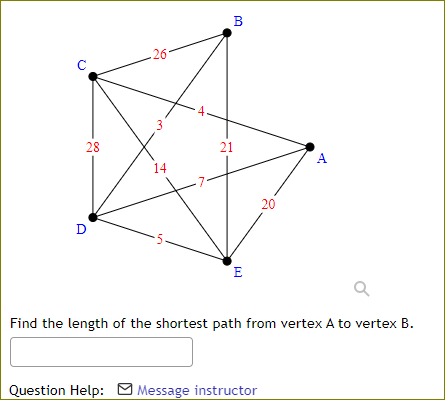

In [9]:
df = pd.read_excel('D://Finance python books//Covid 19 Mark meldrum and damodran//Math for data scientist//Module5-Graph theory//Q4_data_Set.xlsx')

In [10]:
df.to_numpy()

array([[ 0,  0,  4,  7, 20],
       [ 0,  0, 26,  3, 21],
       [ 4, 26,  0, 28, 14],
       [ 7,  3, 28,  0,  5],
       [20, 21, 14,  5,  0]], dtype=int64)

In [11]:
matrix =df.values
g = Graph(matrix)
print (g.shortest_path('a', 'b'))
g.get_distance_of_path(g.shortest_path('a', 'b') )


['a', 'd', 'b']


10

<div class="alert alert-block alert-info">Q15<b></b> 
    
</div>

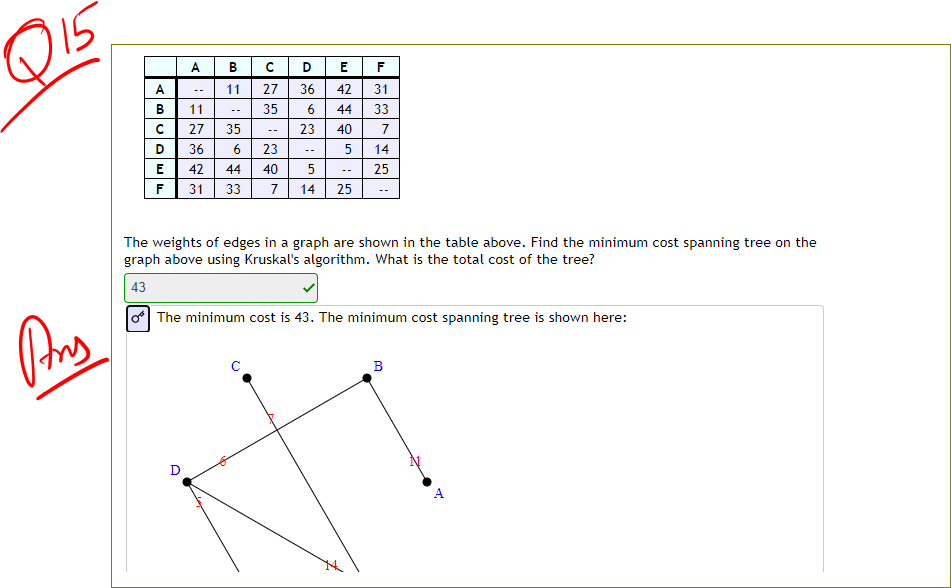

In [12]:
parent = dict()
rank = dict()

def make_set(vertice):
    parent[vertice] = vertice
    rank[vertice] = 0

def find(vertice):
    if parent[vertice] != vertice:
        parent[vertice] = find(parent[vertice])
    return parent[vertice]

def union(vertice1, vertice2):
    root1 = find(vertice1)
    root2 = find(vertice2)
    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        else:
            parent[root1] = root2
            if rank[root1] == rank[root2]: rank[root2] += 1

def kruskal(graph):
    for vertice in graph['vertices']:
        make_set(vertice)

    minimum_spanning_tree = set()
    edges = list(graph['edges'])
    edges.sort()
    for edge in edges:
        weight, vertice1, vertice2 = edge
        if find(vertice1) != find(vertice2):
            union(vertice1, vertice2)
            minimum_spanning_tree.add(edge)
    return minimum_spanning_tree

graph = {
        'vertices': ['A', 'B', 'C', 'D', 'E', 'F'],
        'edges': set([
            (11, 'A', 'B'),
            (27, 'A', 'C'),
            (36, 'A', 'D'),
            (42, 'A', 'E'),
            (31, 'A', 'F'),
            (35, 'B', 'C'),
            (6, 'B', 'D'),
            (44, 'B', 'E'),
            (33, 'B', 'F'),
            (23, 'C', 'D'),
            (40, 'C', 'E'),
            (7, 'C', 'F'),
            (5, 'D', 'E'),
            (14, 'D', 'F'),
            (25, 'E', 'F')
            ])
        }
kruskal(graph)

{(5, 'D', 'E'), (6, 'B', 'D'), (7, 'C', 'F'), (11, 'A', 'B'), (14, 'D', 'F')}

<div class="alert alert-block alert-info">Q14<b></b> 
    
</div>

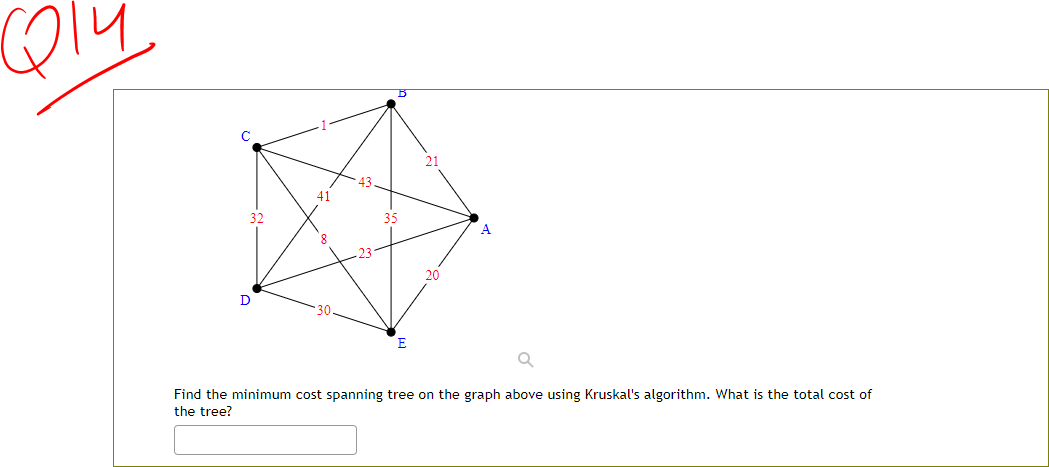

In [13]:
graph = {
        'vertices': ['A', 'B', 'C', 'D', 'E'],
        'edges': set([
            (21, 'A', 'B'),
            (43, 'A', 'C'),
            (23, 'A', 'D'),
            (20, 'A', 'E'),
            (1, 'B', 'C'),
            (41, 'B', 'D'),
            (35, 'B', 'E'),
            (32, 'C', 'D'),
            (8, 'C', 'E'),
            (30, 'D', 'E')
          
            ])
        }
kruskal(graph)

{(1, 'B', 'C'), (8, 'C', 'E'), (20, 'A', 'E'), (23, 'A', 'D')}

In [14]:
# Python3 program to implement traveling salesman 
# problem using naive approach. 
from sys import maxsize 
from itertools import permutations
V = 4
 
# implementation of traveling Salesman Problem 
def travellingSalesmanProblem(graph, s): 
 
    # store all vertex apart from source vertex 
    vertex = [] 
    for i in range(V): 
        if i != s: 
            vertex.append(i) 
 
    # store minimum weight Hamiltonian Cycle 
    min_path = maxsize 
    next_permutation=permutations(vertex)
    for i in next_permutation:
 
        # store current Path weight(cost) 
        current_pathweight = 0
 
        # compute current path weight 
        k = s 
        for j in i: 
            current_pathweight += graph[k][j] 
            k = j 
        current_pathweight += graph[k][s] 
 
        # update minimum 
        min_path = min(min_path, current_pathweight) 
         
    return min_path 
 
 
# Driver Code 
if __name__ == "__main__": 
 
    # matrix representation of graph 
    graph = [[0, 10, 15, 20], [10, 0, 35, 25], 
            [15, 35, 0, 30], [20, 25, 30, 0]] 
    s = 0
    print(travellingSalesmanProblem(graph, s))


80


# Q12

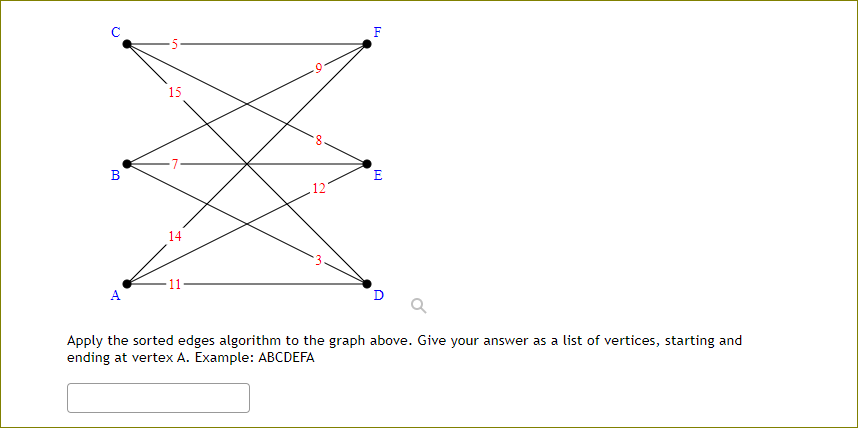

In [27]:
df = pd.read_excel('D://Finance python books//Covid 19 Mark meldrum and damodran//Math for data scientist//Module5-Graph theory//Q12_data_Set.xlsx')

In [28]:
df.head()

,A,B,C,D,E,F
0,0,999,999,14,10,1
1,999,0,999,2,4,6
2,999,999,0,3,15,12
3,14,2,3,0,999,999
4,10,4,15,999,0,999


In [29]:
matrix2 =df.values

In [30]:
matrix2

array([[  0, 999, 999,  14,  10,   1],
       [999,   0, 999,   2,   4,   6],
       [999, 999,   0,   3,  15,  12],
       [ 14,   2,   3,   0, 999, 999],
       [ 10,   4,  15, 999,   0, 999],
       [  1,   6,  12, 999, 999,   0]], dtype=int64)

In [31]:
#https://developers.google.com/optimization/routing/tsp
#https://developers.google.com/optimization/routing/tsp#circuit_board
from __future__ import print_function
import math
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# Where there is no connection between the vertices put the maximum value
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    #data['distance_matrix'] = [
     #   [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
      #  [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
      #  [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
       # [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
        #[1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
       # [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
       # [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
       # [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
       # [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
       # [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
       # [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
       # [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
       # [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
    #]  # yapf: disable
    data['distance_matrix'] = matrix2
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


In [32]:
data = create_data_model()
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

In [33]:
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

In [34]:
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

In [35]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

In [36]:
def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)

In [37]:
solution = routing.SolveWithParameters(search_parameters)
if solution:
    print_solution(manager, routing, solution)

Objective: 32 miles
Route for vehicle 0:
 0 -> 5 -> 2 -> 3 -> 1 -> 4 -> 0



In [38]:
def get_routes(solution, routing, manager):
  """Get vehicle routes from a solution and store them in an array."""
  # Get vehicle routes and store them in a two dimensional array whose
  # i,j entry is the jth location visited by vehicle i along its route.
  routes = []
  for route_nbr in range(routing.vehicles()):
    index = routing.Start(route_nbr)
    route = [manager.IndexToNode(index)]
    while not routing.IsEnd(index):
      index = solution.Value(routing.NextVar(index))
      route.append(manager.IndexToNode(index))
    routes.append(route)
  return routes

In [39]:
routes = get_routes(solution, routing, manager)
# Display the routes.
for i, route in enumerate(routes):
  print('Route', i, route)

Route 0 [0, 5, 2, 3, 1, 4, 0]


In [ ]:
# Appendix learning to develop the algorithm

In [ ]:
import sys
def main():
    print(sys.maxsize)


In [ ]:
if __name__ == '__main__':
    main()

In [ ]:
class Edge:
    def __init__ (self,vertex1, vertex2, weight):
        self.vertex1 = vertex1
        self.vertex2 = vertex2
        self.weight = weight
        
    def getEdgeDetails(self):
        return "Edge: {}<---{}--->{}".format(self.vertex1,self.weight,self.vertex2)
    
class Graph2:
    def __init__(self):
        self.vertices = dict()
    # Undirected graph, we will add both users to each others adjacency list
    # For Directed graph set isDirected to True
    def addEdge(self,edge,isDirected = False):
        if edge.vertex1 not in self.vertices:
            self.vertices[edge.vertex1]=[]
        if not isDirected:
            if edge.vertex2 not in self.vertices:
                self.vertices[edge.vertex2]=[]
        # Maintain Adjacency list
        # Maintain the data in List as Tuple, where we have adjacent vertex and weight
        self.vertices[edge.vertex1].append((edge.vertex2,edge.weight))
        if not isDirected:
            self.vertices[edge.vertex2].append((edge.vertex1,edge.weight))
        
    def printGraph(self):
        print("Number of Vertices in Graph:", len(self.vertices))
        keys = self.vertices.keys()
        for key in keys:
            #print(">> Adjacent List for Vertex:", key)
            print(key,":",end=" ")
            print(self.vertices[key],end=" ")
            print("___________________________")
    
    # Implement this function to detect any cycle in the graph
    def isCyclic(self):
        pass
    
    def Sollins(self):
    pass
    
        
    

In [ ]:
def main():
    edge0 = Edge(0,1,4)
    edge1 = Edge(0,2,4)
    edge2 = Edge(0,3,6)
    edge3 = Edge(0,4,6)
    edge4 = Edge(1,2,2)
    edge5 = Edge(2,3,8)
    edge6 = Edge(3,4,9)

if __name__ == '__main__':
    main()
    

In [ ]:

edges=[]
edges = [edge0,edge1,edge2,edge3,edge4,edge5,edge6]

In [ ]:
edges

In [ ]:
for edge in edges:
    print(edge.getEdgeDetails())

In [ ]:
graph = Graph2()
graph.printGraph()

In [ ]:
for edge in edges:
    graph.addEdge(edge)

In [ ]:
graph.printGraph()

In [ ]:
#implementation of google map

In [ ]:
# Session 33A
# Location or Place in Map
# For our Graph Data structure, Location is kind of Node/Vertex
class Location:
    # A location can have several attributes as in whatever needed
    def __init__(self, latitude, longitude, adrsLine):
        self.latitude = latitude
        self.longitude = longitude
        self.adrsLine = adrsLine
    
    def getLocationDetails(self):
        return "{}[{},{}]".format( self.adrsLine,self.latitude, self.longitude)

# For our Graph Data structure, Path is kind of Edge(Location1, Location2, weight)

class Path:
    def __init__(self, location1, location2, distance):
        self.location1 = location1
        self.location2 = location2
        self.distance = distance
        self.trafic = 1 # 1 as free flow, 2 as Moderate, 3 as Jammed
    def getPathDetails(self):
        return "{}<--------{}----------{}".format(self.location1.adrsLine,self.distance,self.location2.adrsLine)

# Directed/Undirected Weighted Graph
class GoogleMap:
    def __init__(self):
        self.locations = dict()
    # Undirected graph, we will add both users to each others adjacency list
    # For Directed graph set isDirected to True
    def addPath(self,path,isDirected = False):
        if path.location1 not in self.locations:
            self.locations[path.location1]=[]
      
        if path.location2 not in self.locations:
            self.locations[path.location2]=[]
        # Maintain Adjacency list
        # Maintain the data in List as Tuple, where we have adjacent vertex and weight
        self.locations[path.location1].append((path.location2))
        if not isDirected:
            self.locations[path.location2].append((path.location1))
        
    def printGoogleMap(self):
        print("Number of locations in Graph:", len(self.locations))
        keys = self.locations.keys()
        for key in keys:
            #
            print(key.getLocationDetails())
            print("Adjacent List for Locations:")
            for location in self.locations[key]:
                print("{}".format(location.getLocationDetails()))
            #print(self.locations[key],end=" ")
            #
            print("___________________________")
            print()
    
   


    


In [ ]:

location1 = Location(75.234,72.123,"1. Redwood Shores")
location2 = Location(85.234,82.123,"2. Country Homes")
location3 = Location(121.234,112.123,"3. Pristine Magnum")
location4 = Location(79.234,81.123,"4. Bay Side")
location5 = Location(75.234,77.123,"5. Castle woods")
path1 = Path (location1,location2, 10)
path2 = Path (location1,location3, 12)
path3 = Path (location1,location4, 12)
path4 = Path (location2,location3, 16)
path5 = Path (location3,location4, 3)
path6 = Path (location4,location5, 19)
paths = [path1,path2,path3,path4,path5, path6]

 
    

In [ ]:


for path in paths:
    print(path.getPathDetails())

graph = GoogleMap()
graph.printGoogleMap()


   

In [ ]:
paths

In [ ]:
for path in paths:
    # We pass True for Directed Graph
    graph.addPath(path,True)
print()
print(">> Printing Google Map with adjacent Locations")    
graph.printGoogleMap()